# Titanic - Machine Learning from Disaster


## 1. 项目概述
&emsp;&emsp;1912年4月15日，在首次航行期间，被广泛认为是“永不沉没”的泰坦尼克号在与冰山相撞后沉没。

&emsp;&emsp;不幸的是，船上没有足够的救生艇，导致2224名乘客和船员中有1502人死亡。

&emsp;&emsp;虽然幸存中有一些运气因素，但似乎有些人比其他人更有可能生存下来。

&emsp;&emsp;在这个挑战中，要求你使用乘客数据（如姓名、年龄、性别、社会经济等级等），建立一个预测模型来回答这个问题：“什么样的人更有可能生存？”。

## 2. 数据
&emsp;&emsp; 提供训练集`train.csv`，和测试集`test.csv`

&emsp;&emsp;`train.csv `包含乘客的详细信息（准确地说是 891 人），揭示了他们是否幸存，也称为“基本事实”。

&emsp;&emsp;`test.csv` 包含类似的信息，但没有透露每位乘客是否幸存，预测这些结果是你的工作，即：使用你在 `train.csv` 数据中找到的模式，预测船上的其他 418 名乘客（在 `test.csv `中找到）是否幸存。

&emsp;&emsp;`train.csv `数据集中特征的含义：

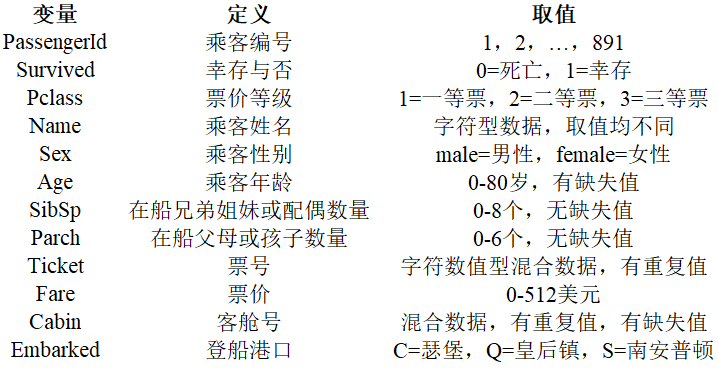

## 3. 问题解决流程
<p>&emsp;&emsp;（1）数据分析；<p>
<p>&emsp;&emsp;（2）数据预处理；<p>
<p>&emsp;&emsp;（3）特征工程；<p>
<p>&emsp;&emsp;（4）建模、预测和解决问题；<p>
<p>&emsp;&emsp;（5）模型评估；<p>
<p>&emsp;&emsp;（6）提交结果。


## 4. 代码示例

### （1）加载数据集

In [1]:
import pandas as pd

# 训练集
train_df = pd.read_csv('./titanic/train.csv')

# 测试集
test_df = pd.read_csv('./titanic/test.csv')

# 合并数据
combine = [train_df, test_df] 

### （2）数据预览

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### （3）统计分析

**数据基本信息**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


在训练集中，7个特征是整数型或浮点型，5个特征是字符串型

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


在测试集中，6个特征是整数型或浮点型，5个特征是字符串型

**获取所有特征名**

In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**哪些特征包含缺失值（空值，null,NaN)**

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

在训练集中，缺失值数目 Cabin > Age > Embarked

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

在测试集中，缺失值数目 Cabin > Age > Fare

**样本中数值特征的分布**

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 样本总数为891 人，约占泰坦尼克号上实际乘客人数（2,224 人）的40%；
- Survived 是具有 0 或 1 值的二分类变量，并且大约 38% 的样本存活；
- 大多数乘客（>50%)的票价等级是三等票；
- 老年乘客占比小；
- 近 30% 的乘客有兄弟姐妹或配偶一同登船；
- 大多数乘客 (>75%) 没有与父母或孩子一起上船；
- 票价差异很大，少数乘客支付高达 512 美元。

**样本中分类特征的分布**

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Name在数据集中是唯一的（count=unique=891）；
- 性别变量有两个可能的值，男性占 65%（top=male，freq=577/891）;
- 票号具有高比例 (22%) 的重复值 (unique=681)；
- 客舱号在样本中也具有较多重复项，说明存在几名乘客共用一个小舱的现象；
- 登船港口有三个可能的值，大多数乘客是S口。

### （4）分析：每个特征与幸存Survived的相关性

**事先假设**
- PassengerId 乘客编号与Survived不相关，应从数据集中删除；
- Name 名字特征初步感觉与Survived不相关
- Age 年龄特征肯定与Survived相关;
- Ticket 票号包含较高重复率(22%)，初步感觉与Survived不相关；
- Cabin 客舱号缺失值过多，舍弃使用；

In [11]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass特征： 可以看到 Pclass=1 和 Survived 之间有显著的相关性（>0.5），因此在模型中应包含此特征

In [12]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex特征： 女性的幸存数高达 74%，因此在模型中应包含性别特征

In [13]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


SibSp 和 Parch 这两个特征对于某些值与Survived具有零相关性，最好从这些单独的特征中派生一个特征或一组特征，使得与Survived有显著相关性

### （5）可视化数据分析

In [15]:
import warnings
warnings.filterwarnings("ignore") #忽略警告信息

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
font = {"family":"MicroSoft YaHei",
       "weight":"bold",
       "size":"12"}
matplotlib.rc("font", **font)

**分析数值特征 Age 与 Survived 相关性**

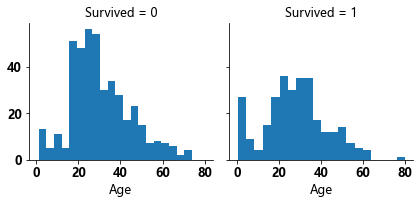

In [16]:
g = sns.FacetGrid(train_df, col='Survived')  
g.map(plt.hist, 'Age', bins=20)

- 婴儿（年龄<=4）的幸存率很高；
- 最年长的乘客（年龄 = 80）幸存下来；
- 大部分15-25 岁的人无法生存；
- 大多数乘客的年龄在 15-35 岁之间。

**不同票价级别的乘客年龄分布**

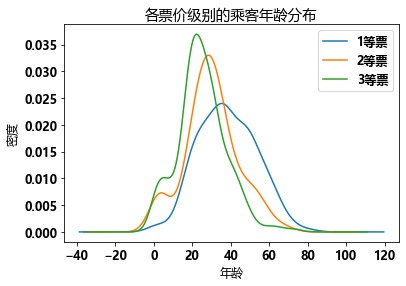

In [17]:
fig = plt.figure()

train_df.Age[train_df.Pclass == 1].plot(kind='kde')   
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各票价级别的乘客年龄分布")
plt.legend((u'1等票', u'2等票',u'3等票'),loc='best') # sets our legend for our graph.
plt.show()

3个不同的票价等级的年龄总体趋势一致，2和3等票的乘客20岁多点的人最多，1等票乘客40岁左右的最多(似乎符合财富和年龄的分配哈)

<Figure size 432x288 with 0 Axes>

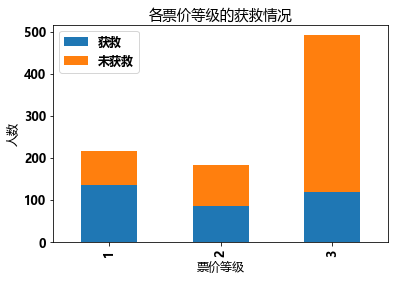

In [18]:
#看看各票价等级 乘客的获救情况
fig = plt.figure()

Survived_0 = train_df.Pclass[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Pclass[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各票价等级的获救情况")
plt.xlabel(u"票价等级") 
plt.ylabel(u"人数") 
plt.show()

- 不同票价等级的乘客可能和财富/地位有关系，最后获救概率也不一样
- Pclass=3 有大多数乘客，但大多数没有幸存；
- Pclass=1 中的大多数乘客幸存下来

**分析Sex 与 Survived 相关性**

<Figure size 432x288 with 0 Axes>

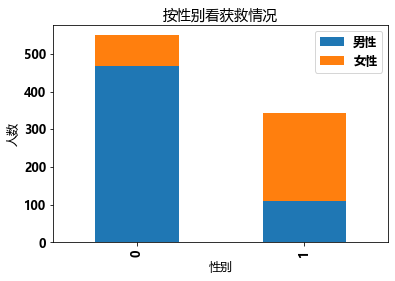

In [19]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_m = train_df.Survived[train_df.Sex == 'male'].value_counts()
Survived_f = train_df.Survived[train_df.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

明显的看出女性的幸存率更高

**分析Embarked 与 Survived 相关性**

<Figure size 432x288 with 0 Axes>

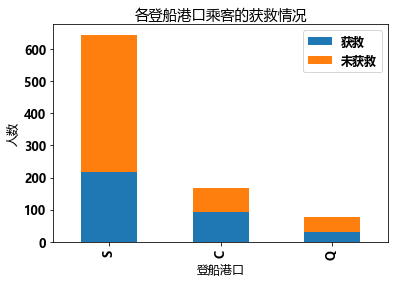

In [20]:
fig = plt.figure()

Survived_0 = train_df.Embarked[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Embarked[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口") 
plt.ylabel(u"人数") 
plt.show()

- 登船港口人数按照S、C、Q递减，而且S远多于另外俩港口
- 不同登船港口的存活率不同

### （6）处理数据

**删除无用特征 Ticket 和 Cabin**

注意一起删除训练集和测试集的无用特征

In [21]:
train_df = train_df.drop([ 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

**从现有特征中提取新特征**
 
 从Name 特征来提取头衔Title特征

In [22]:
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [23]:
# 使用正则表达式提取Title特征
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex']).sort_values(by='female', ascending=False)  # pd.crosstab列联表

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Dr,1,6
Ms,1,0
Lady,1,0
Capt,0,1


In [24]:
# 可以用更常见的名称替换许多标题或将它们归类为其他
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
# 将分类标题转换为数字
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)  
    dataset['Title'] = dataset['Title'].fillna(0)  

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
# 现在可以从训练和测试数据集中删除Name特征以及训练集中的PassengerId 特征
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

**特征Sex转换为数字**

In [27]:
# 转换分类特征Sex
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)  #男性赋值为0，女性赋值为1，并转换为整型数据

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


**填补年龄特征Age的缺失值**

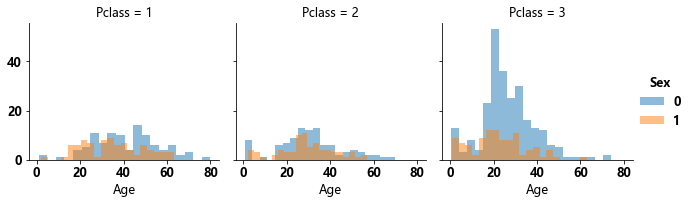

In [28]:
# 思路：使用其他相关特征，注意到 Age、Sex 和 Pclass 之间的相关性，使用 Pclass 和 Sex 特征组合集的 Age 中值预测 Age 值；

# 绘制Age, Pclass, Sex复合直方图
grid = sns.FacetGrid(train_df, col='Pclass', hue='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [29]:
# 创建空数组
guess_ages = np.zeros((2,3))
guess_ages

# 遍历 Sex (0 或 1) 和 Pclass (1, 2, 3) 来计算六种组合的 Age 猜测值
for dataset in combine:
    # 第一个for循环计算每一个分组的Age预测值
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            # 将随机年龄浮点数转换为最接近的 0.5 年龄（四舍五入）
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    # 第二个for循环对空值进行赋值        
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [30]:
# 创建年龄段,并确定其与Survived的相关性
# 一般在建立分类模型时，需要对连续变量离散化，特征离散化后，模型会更稳定，降低了模型过拟合的风险
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)  # 将年龄分割为5段,等距分箱
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [31]:
# 将这些年龄区间替换为序数
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [32]:
# 删除训练集中的AgeBand特征
train_df = train_df.drop(['AgeBand'], axis=1)  
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**结合SibSp和Parch特征创建一个新特征FamilySize，意为包括兄弟姐妹、配偶、父母、孩子和自己的所有家人数量**

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**创建一个新特征IsAlone，取值为0表示不是独自一人，取值为1表示独自一人**

In [34]:
# 创建新特征IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


**舍弃 Parch、SibSp 和 FamilySize 特征，保留 IsAlone，因为 IsAlone 更能反映其与Survived的相关性**

In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


**填补Embarked 缺失值**

登船港口特征Embarked，有三种可能取值 S、Q、C。仅训练数据集有两个缺失值，采用众数填补缺失值。

In [36]:
freq_port = train_df.Embarked.dropna().mode()[0] 
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
# 同样转换分类特征为序数
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


**对票价Fare进行分箱并替换为序数**

In [38]:
# 测试集中Fare有一个缺失值，用中位数进行填补
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

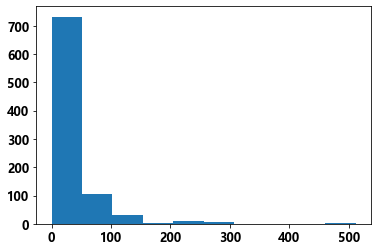

In [39]:
plt.hist(train_df['Fare'])

In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)  # 根据样本分位数进行分箱，等频分箱
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [41]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [42]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


### （7）构建模型并预测

In [43]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [44]:
train_df.drop("Survived", axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


**KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
y_predict = knn.predict(X_test)
score_knn = knn.score(X_train, Y_train)
score_knn

0.8428731762065096

**逻辑回归**

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_predict = log_reg.predict(X_test)  
score_log = log_reg.score(X_train, Y_train)
score_log

0.813692480359147

**SVM**

In [47]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_predict = svc.predict(X_test)
score_svc = svc.score(X_train, Y_train)
score_svc

0.8327721661054994

**朴素贝叶斯**

In [48]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
y_predict = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_train, Y_train)
score_gaussian

0.7732884399551067

**决策树**

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
y_predict = dt_clf.predict(X_test)
score_dt_clf = dt_clf.score(X_train, Y_train)
score_dt_clf

0.8664421997755332

**随机森林**

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)
y_predict = rf_clf.predict(X_test)
score_rf_clf = rf_clf.score(X_train, Y_train)
score_rf_clf

0.8664421997755332

### （8）模型评估

In [51]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'SVM',
              'Naive Bayes', 'Decision Tree','Random Forest' ],
    'Score': [score_knn, score_log, score_svc, 
              score_gaussian, score_dt_clf, score_rf_clf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,0.866442
5,Random Forest,0.866442
0,KNN,0.842873
2,SVM,0.832772
1,Logistic Regression,0.813692
3,Naive Bayes,0.773288


### （9）保存预测结果提交

In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('./submission.csv', index=False)